In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as t
from sklearn.preprocessing import MinMaxScaler


def tanh(args):
    return np.tanh(args)


def d_tanh(args):
    return 1 - np.square(tanh(args))


def error(prediction, targert):
    err = 2 * np.subtract(prediction, targert)
    return err

def accuracy(prediction, target):
    acc = np.absolute((np.subtract(prediction,target)))
    acc = np.divide(acc,target)
    acc = acc * 100
    sz = len(acc)
    acc = np.sum(acc)/sz
    return 100-acc

# Helper function to predict an output
def predict(model, data):
    w1, b1, w2, b2, w3, b3 = model['w1'], model['b1'], model['w2'], model['b2'], model['w3'], model['b3']
    # Forward propagation
    z1 = data.dot(w1) + b1
    a1 = tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = tanh(z2)
    z3 = a2.dot(w3) + b3
    a3 = z3 * 1
    return a3

# This function learns parameters for the neural network and returns the model.
def test_model(model):

    pred_y = predict(model, test_X)
    acc_test = accuracy(pred_y, test_Y)
    print("test accuracy: ", acc_test)
    return pred_y


if __name__ == '__main__':
    # setting up time
    s_time = t.time()
    # setting up hyper paramenters
    input_dimen = 3#node in input layer
    output_dimen = 1#node in output layer
    hidden_1_dimen = 11#node in first hidden layer
    hidden_2_dimen = 7#node in second hidden layer
    
    # Gradient descent parameters
    lr_3 = 0.0001#learning rate for gradient descent
    lr_2 = 0.0001
    lr_1 = 0.0001
    iterations = 45000
    #dataset on which the model is trained
    dataset_train = pd.read_csv('B.csv')
    X = dataset_train.iloc[:, 1:4].values
    Y = dataset_train.iloc[:, 4:5].values

    scaler_x = MinMaxScaler()
    X = scaler_x.fit_transform(X)

In [15]:
 #dataset on which the values are tested/predicted
dataset_test = pd.read_csv('L-505.csv')
depth=dataset_test.iloc[:,:1].values
test_X = dataset_test.iloc[:, 1:4].values
test_Y = dataset_test.iloc[:, 4:5].values

test_X = scaler_x.transform(test_X)

# Initialize the parameters to random values
np.random.seed(0)
w1 = np.random.rand(input_dimen, hidden_1_dimen)
b1 = np.zeros((1, hidden_1_dimen))
w2 = np.random.rand(hidden_1_dimen, hidden_2_dimen)
b2 = np.zeros((1, hidden_2_dimen))
w3 = np.random.rand(hidden_2_dimen, output_dimen)
b3 = np.zeros((1, output_dimen))

model = {'w1': w1, 'w2': w2, 'w3': w3, 'b1': b1, 'b2': b2, 'b3': b3}

acc_train = []#accuracy of training data
acc_test = []#accuracy of testing data
plot_iterations = []
    
# Gradient descent
for loop in range(0, iterations):
    # Forward propagation
    z1 = X.dot(w1) + b1
    a1 = tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = tanh(z2)
    z3 = a2.dot(w3) + b3
    a3 = z3 * 1

    delta4 = error(a3, Y)
    # Backpropagation
    dw3 = a2.T.dot(delta4)
    db3 = np.sum(delta4, axis=0, keepdims=True)
    delta3 = delta4.dot(w3.T) * d_tanh(z2)
    dw2 = a1.T.dot(delta3)
    db2 = np.sum(delta3, axis=0)
    delta2 = delta3.dot(w2.T) * d_tanh(z1)
    dw1 = X.T.dot(delta2)
    db1 = np.sum(delta2, axis=0)
        
    # Gradient descent parameter update
    w1 += -lr_1 * dw1
    b1 += -lr_1 * db1
    w2 += -lr_2 * dw2
    b2 += -lr_2 * db2
    w3 += -lr_3 * dw3
    b3 += -lr_3* db3

        # Assign new parameters to the model
    model = {'w1': w1, 'w2': w2, 'w3': w3, 'b1': b1, 'b2': b2, 'b3': b3}

    if loop % (iterations/20) == 0 or loop == iterations - 1:
        print("training accuracy after %i iterations : %f" % (loop, accuracy(a3, Y)))

    if loop > 40000:
        acc_train.append(accuracy(a3, Y))
        acc_test.append(accuracy(predict(model, test_X),test_Y))
        plot_iterations.append(loop/1000)

t_time = t.time() - s_time
print("Total time: ", t_time)

training accuracy after 0 iterations : -128.826835
training accuracy after 2250 iterations : 90.643661
training accuracy after 4500 iterations : 96.019437
training accuracy after 6750 iterations : 97.431928
training accuracy after 9000 iterations : 98.017423
training accuracy after 11250 iterations : 98.318102
training accuracy after 13500 iterations : 98.501012
training accuracy after 15750 iterations : 98.624354
training accuracy after 18000 iterations : 98.712414
training accuracy after 20250 iterations : 98.777788
training accuracy after 22500 iterations : 98.826990
training accuracy after 24750 iterations : 98.865850
training accuracy after 27000 iterations : 98.897912
training accuracy after 29250 iterations : 98.924692
training accuracy after 31500 iterations : 98.947701
training accuracy after 33750 iterations : 98.967833
training accuracy after 36000 iterations : 98.985996
training accuracy after 38250 iterations : 99.002569
training accuracy after 40500 iterations : 99.017662

test accuracy:  99.04440833317298


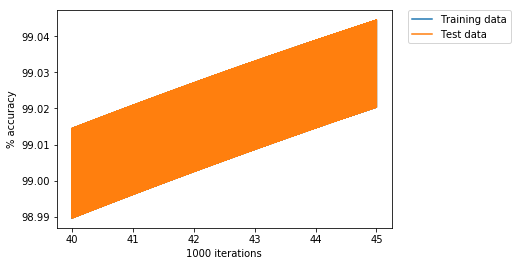

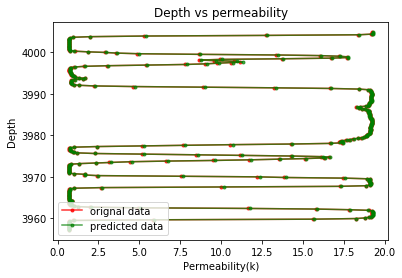

In [18]:
#Store predicted permeability values
k=test_model(model)

#plot for accuracy of train data vs test data
plt.plot(plot_iterations, acc_train, label='Training data')
plt.plot(plot_iterations, acc_test, label='Test data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('1000 iterations')
plt.ylabel('% accuracy')
plt.show()

#plot for depth vs permeability of orginal k vs predicted k
plt.plot(test_Y,depth, marker='.', color='red',alpha=0.8, label='orignal data')
plt.plot(k,depth, marker='.', color='green',alpha=0.7, label='predicted data')
plt.xlabel('Permeability(k)')
plt.ylabel('Depth')
plt.legend(loc='lower left')
plt.title('Depth vs permeability')
plt.savefig('b2.jpg',dpi=300)
plt.show()